In [ ]:
'''This dataset consists of information about various fruits. For each fruit, multiple attributes have been recorded to provide a comprehensive overview of its characteristics. Currently, the dataset has been described for apples. '''

Example MSE: 0.002568077069548742
Example PSNR: 25.903919469670882 dB


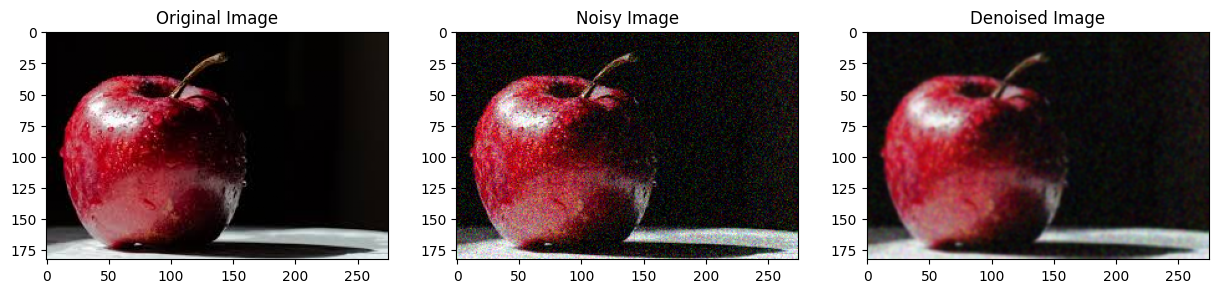

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# Function to add Gaussian noise to an image
def add_gaussian_noise(image, mean=0, var=0.01):
    sigma = var**0.5
    gaussian = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + gaussian
    noisy_image = np.clip(noisy_image, 0, 1)  # Ensure pixel values are within [0, 1]
    return noisy_image

# Function to load images from a folder
def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
            img = img / 255.0  # Normalize the image to [0, 1]
            images.append(img)
    return images

# Function to remove noise using Gaussian filter
def remove_noise_with_gaussian_filter(noisy_image, kernel_size=5):
    denoised_image = cv2.GaussianBlur(noisy_image, (kernel_size, kernel_size), 0)
    return denoised_image

# Function to calculate Mean Square Error (MSE)
def calculate_mse(original_image, denoised_image):
    mse = np.mean((original_image - denoised_image) ** 2)
    return mse

# Function to calculate Peak Signal-to-Noise Ratio (PSNR)
def calculate_psnr(original_image, denoised_image):
    mse = calculate_mse(original_image, denoised_image)
    if mse == 0:
        return 100  # Arbitrarily high PSNR value if there's no error
    max_pixel_value = 1.0  # Since images are normalized between 0 and 1
    psnr = 20 * np.log10(max_pixel_value / np.sqrt(mse))
    return psnr

# Load images from the Potato___Early_blight folder (can be done for other folders as well)
folder_path = "./train/Apple"
images = load_images_from_folder(folder_path)

# Add Gaussian noise to each image
noisy_images = [add_gaussian_noise(image) for image in images]

# Apply Gaussian filter to each noisy image
denoised_images = [remove_noise_with_gaussian_filter(image) for image in noisy_images]

# Calculate MSE and PSNR for each image
mse_values = [calculate_mse(images[i], denoised_images[i]) for i in range(len(images))]
psnr_values = [calculate_psnr(images[i], denoised_images[i]) for i in range(len(images))]

# Display results for the first image as an example
print(f"Example MSE: {mse_values[0]}")
print(f"Example PSNR: {psnr_values[0]} dB")

# Plot original, noisy, and denoised images for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(images[0])
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(noisy_images[0])
plt.title("Noisy Image")

plt.subplot(1, 3, 3)
plt.imshow(denoised_images[0])
plt.title("Denoised Image")

plt.show()

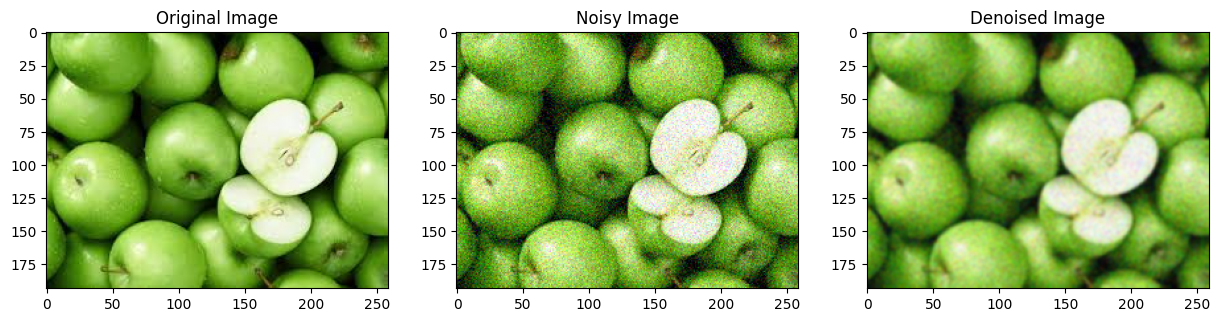

In [2]:

# Plot original, noisy, and denoised images for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(images[2])
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(noisy_images[2])
plt.title("Noisy Image")

plt.subplot(1, 3, 3)
plt.imshow(denoised_images[2])
plt.title("Denoised Image")

plt.show()

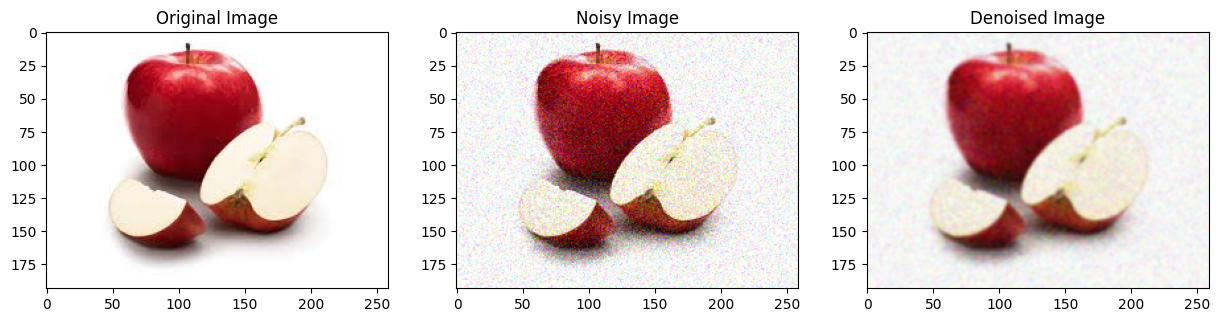

In [3]:

# Plot original, noisy, and denoised images for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(images[5])
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(noisy_images[5])
plt.title("Noisy Image")

plt.subplot(1, 3, 3)
plt.imshow(denoised_images[5])
plt.title("Denoised Image")

plt.show()

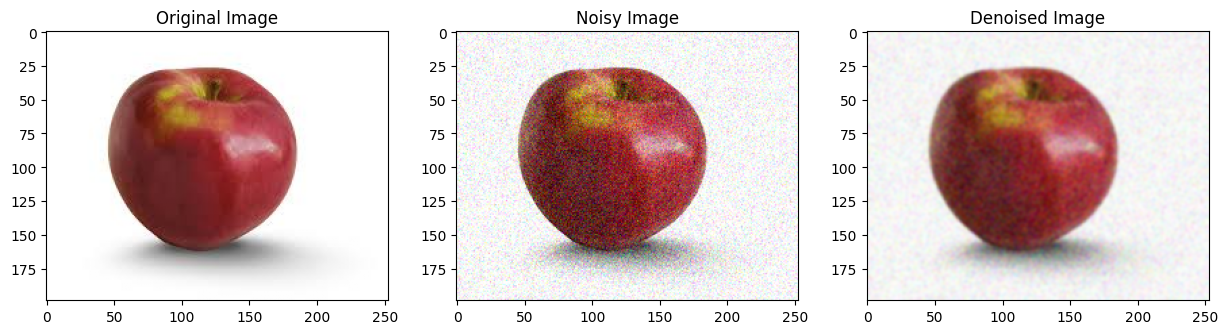

In [4]:

# Plot original, noisy, and denoised images for comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(images[7])
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(noisy_images[7])
plt.title("Noisy Image")

plt.subplot(1, 3, 3)
plt.imshow(denoised_images[7])
plt.title("Denoised Image")

plt.show()